<a href="https://colab.research.google.com/github/koksal100/Deep-Learning/blob/main/MultiClass_Image_Classification_using_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
import random
import os
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/flowers"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/flowers'.
There are 1 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos'.
There are 5 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/train'.
There are 0 directories and 617 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/train/roses'.
There are 0 directories and 674 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/train/sunflowers'.
There are 0 directories and 607 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/train/daisy'.
There are 0 directories and 773 images in '/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/train/tulips'.
There are 0 directories and 872 images in '/content/drive/MyDrive/Colab 

In [3]:
train_dir="/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/train"
test_dir="/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/test"
validation_dir="/content/drive/MyDrive/Colab Notebooks/flowers/flowers/flower_photos/validation"

Previously, we've used the ImageDataGenerator class.

However, as of August 2023, this class is deprecated and isn't recommended for future usage (it's too slow).

Because of this, we'll move ont,o using tf.keras.utils.image_dataset_from_directory().

In [4]:
train_dataset=tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(224,224))
test_dataset=tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(224,224))
valiation_dataset=tf.keras.utils.image_dataset_from_directory(directory=validation_dir,
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(224,224))


Found 3543 files belonging to 5 classes.
Found 50 files belonging to 5 classes.
Found 80 files belonging to 5 classes.


For now, the main parameters we're concerned about in the image_dataset_from_directory() funtion are:

directory - the filepath of the target directory we're loading images in from.
image_size - the target size of the images we're going to load in (height, width).
batch_size - the batch size of the images we're going to load in. For example if the batch_size is 32 (the default), batches of 32 images and labels at a time will be passed to the model.

In [5]:
train_dataset.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [6]:
test_dataset.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
# See an example batch of data
for images, labels in train_dataset.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.59696777e+02 1.60696777e+02 1.55080704e+02]
   [1.59673096e+02 1.60673096e+02 1.54673096e+02]
   [1.83482147e+02 1.84401794e+02 1.79642853e+02]
   ...
   [1.63051315e+02 1.62051315e+02 1.44051315e+02]
   [1.56517838e+02 1.56787918e+02 1.41031219e+02]
   [1.51449661e+02 1.50848175e+02 1.35382004e+02]]

  [[1.61649551e+02 1.62649551e+02 1.57033478e+02]
   [1.61385345e+02 1.62385345e+02 1.56385345e+02]
   [1.82810883e+02 1.83789185e+02 1.78854294e+02]
   ...
   [1.66051315e+02 1.64992676e+02 1.47168625e+02]
   [1.61115234e+02 1.58385330e+02 1.43385330e+02]
   [1.55318146e+02 1.52588242e+02 1.37027756e+02]]

  [[1.63835373e+02 1.64835373e+02 1.59136169e+02]
   [1.62912949e+02 1.63912949e+02 1.57912949e+02]
   [1.82897781e+02 1.83897781e+02 1.78897781e+02]
   ...
   [1.67691498e+02 1.66611145e+02 1.48852203e+02]
   [1.63761139e+02 1.61194168e+02 1.45544617e+02]
   [1.56931305e+02 1.54147827e+02 1.39147827e+02]]

  ...

  [[4.81490974e+01 6.31490974e+01 3.01490974e+01]
   [5

In [8]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

24274472/24274472 [==============================] - 0s 0us/step


In [10]:
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer_of_Emirhan")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(5, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_0 = model_0.fit(train_dataset,
                                 epochs=5,
                                 validation_data=test_dataset,

                               )

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
111/111 [==============================] - 34s 231ms/step - loss: 0.6758 - accuracy: 0.7821 - val_loss: 0.6008 - val_accuracy: 0.8400
Epoch 2/5
111/111 [==============================] - 15s 131ms/step - loss: 0.3362 - accuracy: 0.8992 - val_loss: 0.5297 - val_accuracy: 0.8400
Epoch 3/5
111/111 [==============================] - 15s 129ms/step - loss: 0.2622 - accuracy: 0.9272 - val_loss: 0.5020 - val_accuracy: 0.8400
Epoch 4/5
111/111 [==============================] - 15s 127ms/step - loss: 0.2173 - accuracy: 0.9365 - val_loss: 0.4936 - val_accuracy: 0.8600
Epoch 5/5
111/111 [==============================] - 15s 126ms/step - loss: 0.1954 - accuracy: 0.9464 - val_loss: 0.4781 - val_accuracy: 0.8600


In [12]:
model_0.evaluate(valiation_dataset)

3/3 [==============================] - 10s 632ms/step - loss: 0.3065 - accuracy: 0.9375


[0.3064750134944916, 0.9375]

In [14]:
# Check layers in our base model
for layer_number, layer in enumerate(model_0.layers):
  print(layer_number, layer.name)

0 input_layer
1 efficientnetv2-b0
2 global_average_pooling_layer_of_Emirhan
3 output_layer


In [15]:
# Check summary of model constructed with Functional API
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er_of_Emirhan (GlobalAvera                                      
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 5925717 (22.60 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________

<Axes: >

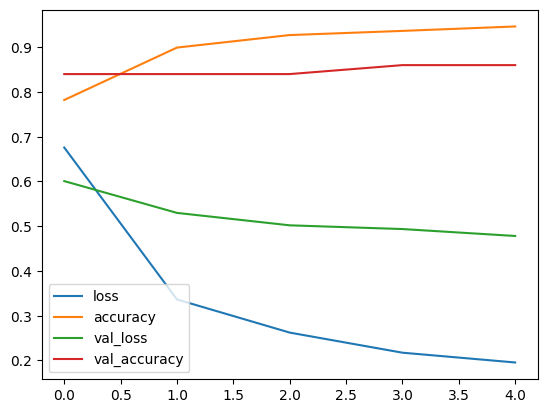

In [17]:
import pandas as pd
pd.DataFrame(history_0.history).plot()

In [18]:
#Let's add data augmentation to this model to fix the overfitting problem that can be understood by loss curves.

Adding a data augmentation layer to the model has the following benefits:

Preprocessing of the images (augmenting them) happens on the GPU rather than on the CPU (much faster).
Images are best preprocessed on the GPU where as text and structured data are more suited to be preprocessed on the CPU.
Image data augmentation only happens during training so we can still export our whole model and use it elsewhere. And if someone else wanted to train the same model as us, including the same kind of data augmentation, they could.

The data augmentation transformations we're going to use are:

tf.keras.layers.RandomFlip - flips image on horizontal or vertical axis.
tf.keras.layersRandomRotation - randomly rotates image by a specified amount.
tf.keras.layers.RandomZoom - randomly zooms into an image by specified amount.
tf.keras.layers.RandomHeight - randomly shifts image height by a specified amount.
tf.keras.layers.RandomWidth - randomly shifts image width by a specified amount.
tf.keras.layers.Rescaling - normalizes the image pixel values to be between 0 and 1

In [20]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.25),
  layers.RandomZoom(0.25),
  layers.RandomHeight(0.25),
  layers.RandomWidth(0.25),
  layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation_of_Emirhan")

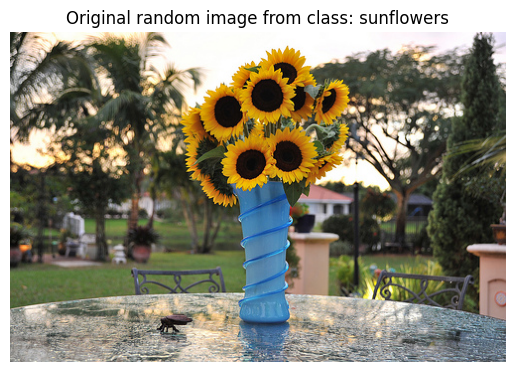

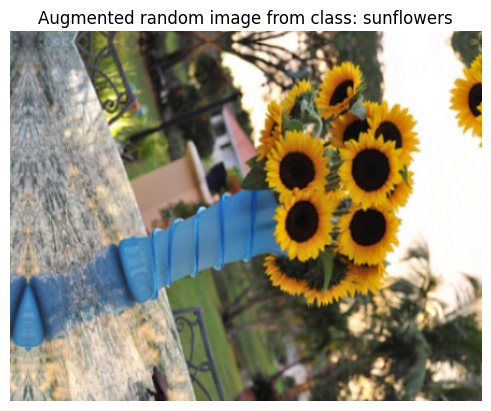

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_dataset.class_names) # choose a random class
target_dir = train_dir+"/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [28]:
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model_2.trainable = False
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=base_model_2(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer_of_Emirhan")(x)
outputs=tf.keras.layers.Dense(5,activation="softmax",name="output_layer")(x)

model_1=tf.keras.Model(inputs,outputs)

In [29]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_of_Emirh  (None, None, None, 3)     0         
 an (Sequential)                                                 
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er_of_Emirhan (GlobalAvera                                      
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 5)                 6405

In [34]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
history_1 = model_1.fit(train_dataset,
                                 epochs=5,
                                 validation_data=test_dataset,

                               )

Epoch 1/5
111/111 [==============================] - 127s 1s/step - loss: 0.8057 - accuracy: 0.7285 - val_loss: 0.6680 - val_accuracy: 0.8000
Epoch 2/5
111/111 [==============================] - 88s 787ms/step - loss: 0.5043 - accuracy: 0.8312 - val_loss: 0.6058 - val_accuracy: 0.8200
Epoch 3/5
111/111 [==============================] - 72s 642ms/step - loss: 0.4181 - accuracy: 0.8524 - val_loss: 0.5885 - val_accuracy: 0.8000
Epoch 4/5
111/111 [==============================] - 71s 624ms/step - loss: 0.3934 - accuracy: 0.8609 - val_loss: 0.5685 - val_accuracy: 0.8200
Epoch 5/5
111/111 [==============================] - 65s 575ms/step - loss: 0.3631 - accuracy: 0.8724 - val_loss: 0.5403 - val_accuracy: 0.8400


<Axes: >

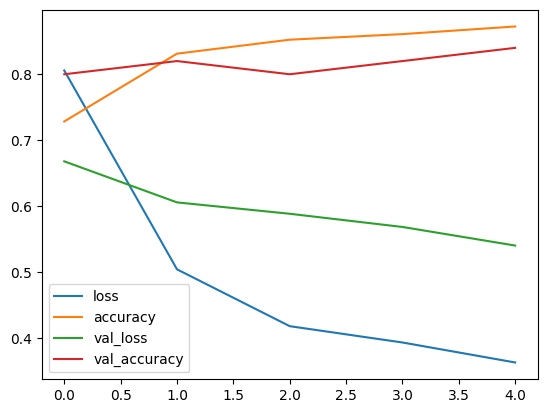

In [36]:
pd.DataFrame(history_1.history).plot()

In [37]:
model_1.evaluate(valiation_dataset)

3/3 [==============================] - 1s 88ms/step - loss: 0.3188 - accuracy: 0.8750


[0.3187989294528961, 0.875]

In [39]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [41]:
# Make all the layers in model_2_base_model trainable
base_model_2.trainable = True

# Freeze all layers except for the last 10
for layer in base_model_2.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [42]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [43]:
#Last 10 layers of the baseModel2 are trainable now.

In [45]:
print(len(model_1.trainable_variables))

12


In [47]:
history_fine_ = model_1.fit(train_dataset,
                                               epochs=10,
                                               validation_data=test_dataset,
                                               initial_epoch=history_1.epoch[-1]# start from previous last epoch
                                               )

Epoch 5/10
111/111 [==============================] - 75s 578ms/step - loss: 0.3032 - accuracy: 0.8956 - val_loss: 0.5761 - val_accuracy: 0.8400
Epoch 6/10
111/111 [==============================] - 56s 497ms/step - loss: 0.2888 - accuracy: 0.8992 - val_loss: 0.5676 - val_accuracy: 0.8200
Epoch 7/10
111/111 [==============================] - 55s 486ms/step - loss: 0.2741 - accuracy: 0.8990 - val_loss: 0.5909 - val_accuracy: 0.8600
Epoch 8/10
111/111 [==============================] - 51s 443ms/step - loss: 0.2514 - accuracy: 0.9091 - val_loss: 0.5868 - val_accuracy: 0.8600
Epoch 9/10
111/111 [==============================] - 52s 458ms/step - loss: 0.2337 - accuracy: 0.9170 - val_loss: 0.5449 - val_accuracy: 0.8400
Epoch 10/10
111/111 [==============================] - 52s 457ms/step - loss: 0.2167 - accuracy: 0.9221 - val_loss: 0.6018 - val_accuracy: 0.8600


In [48]:
model_1.evaluate(valiation_dataset)

3/3 [==============================] - 1s 71ms/step - loss: 0.2771 - accuracy: 0.9125


[0.2771354913711548, 0.9125000238418579]

In [49]:
#With fine tunning we reach better accuracy and less loss with the validation dataset.